## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

    Data Description:
    Murder -- Muder rates in different places of United States
    Assualt- Assualt rate in different places of United States
    UrbanPop - urban population in different places of United States
    Rape - Rape rate in different places of United States


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sns

In [2]:
crime_data = pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## Data Preparation

In [3]:
crime_data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [4]:
crime_data = crime_data.drop('Unnamed: 0',axis =1)
crime_data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [5]:
# Normalizatio 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x
crime_data_norm = norm_func(crime_data.iloc[:,0:])
crime_data_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


## Model Building

### Hierarchical

In [6]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

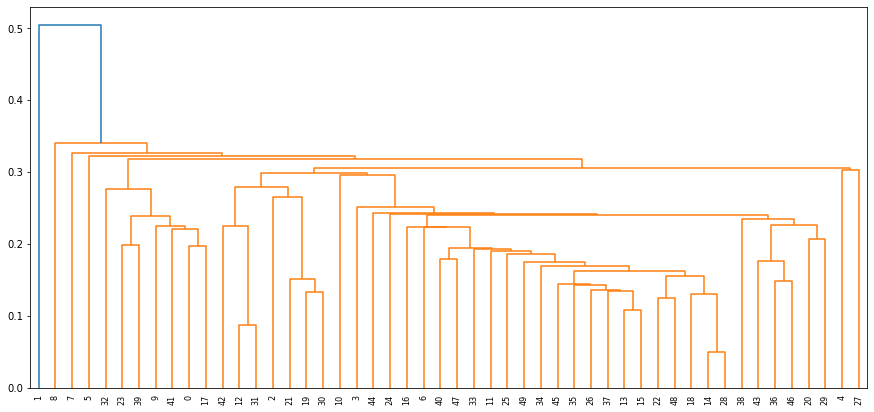

In [7]:
# Creating Dendogram
plt.figure(figsize=(15,7))
dendogram = sch.dendrogram(sch.linkage(crime_data_norm, method='single',metric='euclidean'))
dendogram
plt.show()

In [8]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
y_hc_cluster_pred = hc.fit_predict(crime_data_norm)
y_hc_cluster_pred

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:

y_df= pd.DataFrame(y_hc_cluster_pred,columns=['Cluster_hierarchical'])

In [10]:
crime_data['cluster_hierarchical']=y_df
crime_data

,Murder,Assault,UrbanPop,Rape,cluster_hierarchical
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


In [11]:
crime_data[crime_data['cluster_hierarchical']==0]

,Murder,Assault,UrbanPop,Rape,cluster_hierarchical
0,13.2,236,58,21.2,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
9,17.4,211,60,25.8,0
10,5.3,46,83,20.2,0
11,2.6,120,54,14.2,0
12,10.4,249,83,24.0,0


In [12]:
crime_data[crime_data['cluster_hierarchical']==1]

,Murder,Assault,UrbanPop,Rape,cluster_hierarchical
7,5.9,238,72,15.8,1


In [13]:
crime_data[crime_data['cluster_hierarchical']==2]

,Murder,Assault,UrbanPop,Rape,cluster_hierarchical
8,15.4,335,80,31.9,2


In [14]:
crime_data[crime_data['cluster_hierarchical']==3]

,Murder,Assault,UrbanPop,Rape,cluster_hierarchical
1,10.0,263,48,44.5,3


In [15]:
crime_data[crime_data['cluster_hierarchical']==4]

,Murder,Assault,UrbanPop,Rape,cluster_hierarchical


In [16]:
crime_data['cluster_hierarchical'].value_counts()

0    47
1     1
2     1
3     1
Name: cluster_hierarchical, dtype: int64

### Kmeans Clustering

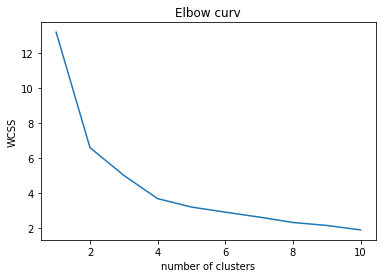

In [17]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(crime_data_norm)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
model = KMeans(n_clusters=4)
y_pred_kmean = model.fit_predict(crime_data_norm)
y_pred_kmean

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3])

In [19]:
y_df_kmean = pd.DataFrame(y_pred_kmean,columns=['cluster_kmean'])

In [20]:
crime_data['cluster_kmean']=y_df_kmean
crime_data

,Murder,Assault,UrbanPop,Rape,cluster_hierarchical,cluster_kmean
0,13.2,236,58,21.2,0,2
1,10.0,263,48,44.5,3,0
2,8.1,294,80,31.0,0,0
3,8.8,190,50,19.5,0,2
4,9.0,276,91,40.6,0,0
5,7.9,204,78,38.7,0,0
6,3.3,110,77,11.1,0,3
7,5.9,238,72,15.8,1,3
8,15.4,335,80,31.9,2,0
9,17.4,211,60,25.8,0,2


In [21]:
crime_data_1 = crime_data.iloc[:,[0,1,2,3,5]]
crime_data_1

,Murder,Assault,UrbanPop,Rape,cluster_kmean
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,3
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,2


In [22]:
crime_data_1.groupby(crime_data_1.cluster_kmean).mean()

,Murder,Assault,UrbanPop,Rape
cluster_kmean,,,,
0,10.966667,264.000000,76.500000,33.608333
1,3.600000,78.538462,52.076923,12.176923
2,13.937500,243.625000,53.750000,21.412500
3,5.852941,141.176471,73.647059,19.335294


In [23]:
crime_data_1['cluster_kmean'].value_counts()

3    17
1    13
0    12
2     8
Name: cluster_kmean, dtype: int64

### DBSCAN Clustering

In [24]:
from sklearn.cluster import DBSCAN
d =DBSCAN(eps=0.2,min_samples=2)
y_pred_dbscan = d.fit_predict(crime_data_norm)
y_pred_dbscan

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2,  1,  1,  1, -1,
        0,  1,  3, -1,  3,  1,  4, -1,  1,  1, -1,  1, -1,  3,  2, -1,  1,
        1,  1,  5,  1, -1,  4,  1, -1, -1,  5, -1,  1,  5,  1,  1,  1],
      dtype=int64)

In [25]:
df_dbscan = pd.DataFrame(y_pred_dbscan,columns = ['cluster_dbscan'])

In [26]:
crime_data['cluster_DBSCAN'] = df_dbscan
crime_data

,Murder,Assault,UrbanPop,Rape,cluster_hierarchical,cluster_kmean,cluster_DBSCAN
0,13.2,236,58,21.2,0,2,0
1,10.0,263,48,44.5,3,0,-1
2,8.1,294,80,31.0,0,0,-1
3,8.8,190,50,19.5,0,2,-1
4,9.0,276,91,40.6,0,0,-1
5,7.9,204,78,38.7,0,0,-1
6,3.3,110,77,11.1,0,3,-1
7,5.9,238,72,15.8,1,3,-1
8,15.4,335,80,31.9,2,0,-1
9,17.4,211,60,25.8,0,2,-1


In [27]:
crime_data.iloc[:,[0,1,2,3,6]].groupby(crime_data['cluster_DBSCAN']).mean()

,Murder,Assault,UrbanPop,Rape,cluster_DBSCAN
cluster_DBSCAN,,,,,
-1,8.915000,198.100000,69.950000,24.635000,-1.0
0,14.300000,242.500000,62.000000,21.700000,0.0
1,4.644444,99.222222,59.000000,14.577778,1.0
2,10.750000,251.500000,84.500000,25.050000,2.0
3,11.600000,280.000000,70.333333,31.666667,3.0
4,15.250000,269.000000,46.000000,19.800000,4.0
5,4.033333,141.333333,73.333333,26.133333,5.0


In [28]:
crime_data['cluster_DBSCAN'].value_counts()

-1    20
 1    18
 3     3
 5     3
 0     2
 2     2
 4     2
Name: cluster_DBSCAN, dtype: int64

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 

In [29]:
airline_data = pd.read_csv('EastWestAirlines.csv')
airline_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [30]:
airline_data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [31]:
airline_data_1 = airline_data.drop(['ID#'],axis=1)
airline_data_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [32]:
# Normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

airline_data_norm = norm_func(airline_data_1.iloc[:,0:])
airline_data_norm
# from sklearn.preprocessing import normalize
# airline_data_norm = pd.DataFrame(normalize(airline_data_1),columns=airline_data_1.columns )
# airline_data_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


## Model Building

### Hierarchical

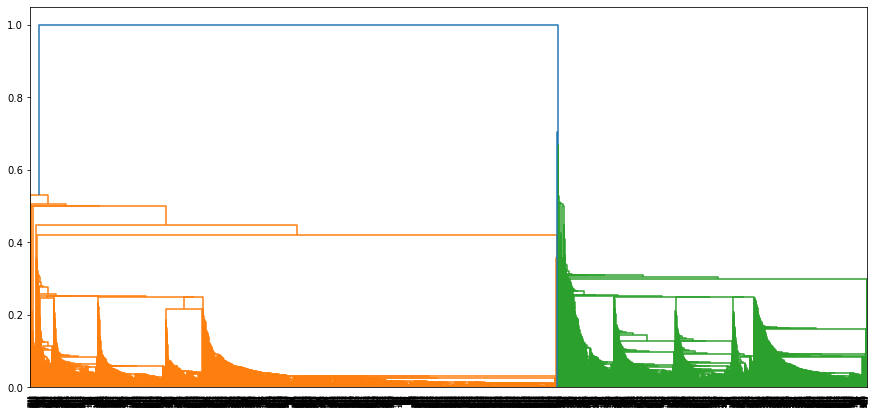

In [93]:
# Dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(airline_data_norm, method='single',metric='euclidean'))
dendrogram
plt.show()

In [33]:
# Hierarchial Model
model_h = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
y_hc_cluster_pred = model_h.fit_predict(airline_data_norm)
y_hc_cluster_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [34]:
y_hie_df = pd.DataFrame(y_hc_cluster_pred,columns=['Hierarchy_Cluster'])

In [35]:
airline_data['Hierarchy_Cluster'] = y_hie_df
airline_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchy_Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [36]:
airline_data.iloc[:,1:].groupby(airline_data.Hierarchy_Cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchy_Cluster
Hierarchy_Cluster,,,,,,,,,,,,
0,97070.248817,240.183232,2.663962,1.015551,1.018256,28760.204868,15.742394,837.403651,2.565247,4629.066261,1.0,0
1,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1
2,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0,2
3,8557.000000,0.000000,1.000000,1.000000,1.000000,200622.000000,5.000000,622.000000,3.000000,1955.000000,1.0,3


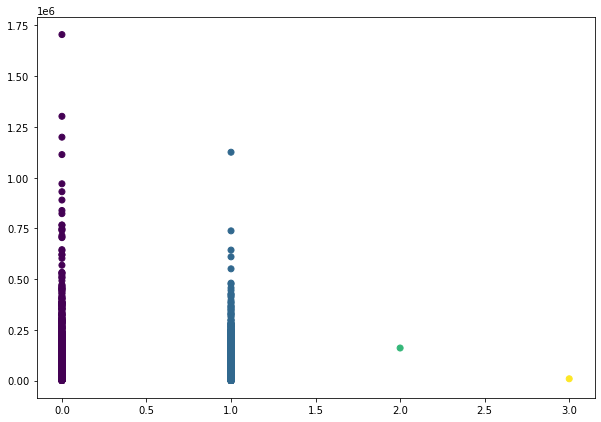

Hierarchy_Cluster
1                    2518
0                    1479
2                       1
3                       1
dtype: int64

In [37]:
plt.figure(figsize=(10,7))
plt.scatter(airline_data['Hierarchy_Cluster'],airline_data['Balance'],c=model_h.labels_)
plt.show()
y_hie_df.value_counts()

### Kmeans Clustering

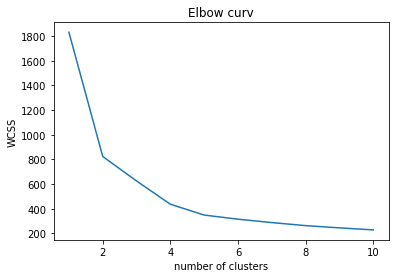

In [38]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(airline_data_norm)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
model = KMeans(n_clusters=4)
y_pred_kmean = model.fit_predict(airline_data_norm)
y_pred_kmean

array([0, 0, 0, ..., 1, 0, 0])

In [40]:
y_df_kmean = pd.DataFrame(y_pred_kmean,columns=['cluster_kmean'])

In [41]:
airline_data['cluster_kmean']=y_df_kmean
airline_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchy_Cluster,cluster_kmean
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [42]:
airline_kmean = airline_data.drop('Hierarchy_Cluster',axis=1)
airline_kmean

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_kmean
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [43]:
airline_kmean.iloc[:,1:].groupby(airline_kmean.cluster_kmean).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_kmean
cluster_kmean,,,,,,,,,,,,
0,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0,0
1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,1
2,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0,2
3,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,3


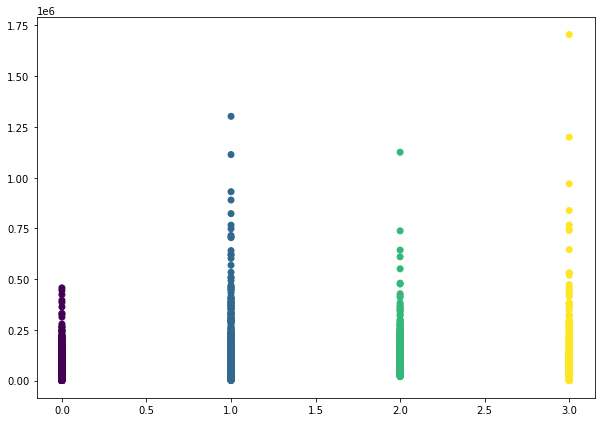

0    1897
1     808
3     673
2     621
Name: cluster_kmean, dtype: int64

In [44]:
plt.figure(figsize=(10,7))
plt.scatter(airline_data['cluster_kmean'],airline_data['Balance'],c=model.labels_)
plt.show()
airline_kmean['cluster_kmean'].value_counts()

### DBSCAN Clustring

In [45]:
from sklearn.cluster import DBSCAN
d =DBSCAN(eps=0.2,min_samples=2)
y_pred_dbscan = d.fit_predict(airline_data_norm)
y_pred_dbscan

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [46]:
df_dbscan = pd.DataFrame(y_pred_dbscan,columns = ['cluster_dbscan'])

In [47]:
airline_data['cluster_DBSCAN'] = df_dbscan
airline_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchy_Cluster,cluster_kmean,cluster_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,3,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,3,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0


In [48]:
airline_dbscan = airline_data.drop(['Hierarchy_Cluster','cluster_kmean'],axis=1)
airline_dbscan

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [49]:
airline_dbscan.iloc[:,1:].groupby(airline_dbscan.cluster_DBSCAN).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_DBSCAN
cluster_DBSCAN,,,,,,,,,,,,
-1,244435.480315,1708.283465,2.96063,1.125984,1.385827,56777.535433,29.149606,3827.488189,10.748031,4879.952756,0.724409,-1.0
0,37769.697867,75.953791,1.00000,1.000000,1.000000,2405.810427,5.562204,229.817536,0.658768,3564.023697,0.000000,0.0
1,83552.146341,80.038328,4.00000,1.000000,1.000000,40788.968641,19.682927,503.710801,1.613240,4756.362369,1.000000,1.0
2,88644.361371,21.732087,3.00000,1.000000,1.000000,18840.588785,15.800623,144.766355,0.420561,4175.442368,0.000000,2.0
3,76533.329480,161.579961,1.00000,1.000000,1.000000,6677.620424,8.094412,805.121387,2.630058,4304.129094,1.000000,3.0
4,69095.970480,55.007380,3.00000,1.000000,1.000000,20667.103321,16.741697,349.405904,0.959410,4475.369004,1.000000,4.0
5,66153.011429,42.017143,2.00000,1.000000,1.000000,10033.485714,13.845714,103.805714,0.291429,4200.811429,0.000000,5.0
6,145016.335135,73.756757,5.00000,1.000000,1.000000,76652.610811,21.675676,570.837838,1.810811,5498.264865,1.000000,6.0
7,132409.674757,14.577670,4.00000,1.000000,1.000000,37877.524272,17.708738,245.247573,0.660194,4730.936893,0.000000,7.0


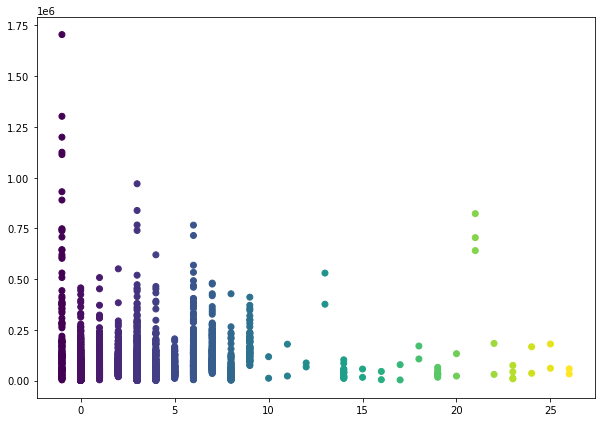

 0     1688
 3      519
 2      321
 1      287
 4      271
 7      206
 6      185
 5      175
-1      127
 8       96
 9       67
 14      16
 19       8
 23       4
 21       3
 17       2
 15       2
 13       2
 11       2
 18       2
 20       2
 10       2
 12       2
 16       2
 26       2
 24       2
 22       2
 25       2
Name: cluster_DBSCAN, dtype: int64

In [50]:
plt.figure(figsize=(10,7))
plt.scatter(airline_data['cluster_DBSCAN'],airline_data['Balance'],c=d.labels_)
plt.show()
airline_dbscan['cluster_DBSCAN'].value_counts()